## Anna Valentine
### ENGG139.2: Polar Engineering, Polar Hydro
### HW2: ISOTOPES

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
## import csv into pandas dataframe
o18 = pd.read_excel('Dansgaard_d18O.xlsx')


In [4]:
## let's see that the tables were loaded in correctly

o18

,T (degC),d18O
0,-50.562744,-49.367190
1,-40.851665,-41.643547
2,-30.301727,-34.900833
3,-28.356468,-34.127495
4,-27.668669,-32.093136
5,-23.915932,-30.897224
6,-24.198689,-29.775484
7,-21.000948,-29.000889
8,-19.750128,-28.578876
9,-22.539782,-26.968763


## First, let's make our model: 

### calculate temp: 

In [5]:
def temp(theta): 
    return -0.0046*(theta**2) - 0.3816*theta + 303.42

In [6]:
#### okay let's make a array of the part of the earth we want to look at: 
theta = np.arange(0, 90, 1)  # start, stop, ste

#### and let's calculate the temperature for that array: 
temps = []
for th in theta: temps.append(temp(th))

In [7]:
np.float_(temps)

array([303.42  , 303.0338, 302.6384, 302.2338, 301.82  , 301.397 ,
       300.9648, 300.5234, 300.0728, 299.613 , 299.144 , 298.6658,
       298.1784, 297.6818, 297.176 , 296.661 , 296.1368, 295.6034,
       295.0608, 294.509 , 293.948 , 293.3778, 292.7984, 292.2098,
       291.612 , 291.005 , 290.3888, 289.7634, 289.1288, 288.485 ,
       287.832 , 287.1698, 286.4984, 285.8178, 285.128 , 284.429 ,
       283.7208, 283.0034, 282.2768, 281.541 , 280.796 , 280.0418,
       279.2784, 278.5058, 277.724 , 276.933 , 276.1328, 275.3234,
       274.5048, 273.677 , 272.84  , 271.9938, 271.1384, 270.2738,
       269.4   , 268.517 , 267.6248, 266.7234, 265.8128, 264.893 ,
       263.964 , 263.0258, 262.0784, 261.1218, 260.156 , 259.181 ,
       258.1968, 257.2034, 256.2008, 255.189 , 254.168 , 253.1378,
       252.0984, 251.0498, 249.992 , 248.925 , 247.8488, 246.7634,
       245.6688, 244.565 , 243.452 , 242.3298, 241.1984, 240.0578,
       238.908 , 237.749 , 236.5808, 235.4034, 234.2168, 233.0

### calculate H sat 

In [8]:
### define our parameters: 
del_H = 40650 ## J / mol
H_0 = 22.9   # g/m^3
R = 8.3145
T_0 = 298 # Kelvin

In [9]:
### function to calculate H_sat
def h_sat_calc(del_H, H_0, R, T_0, T):
    h_sat_result = H_0 * np.exp((del_H/R)*((1/T_0)-(1/T)))
    return h_sat_result

In [10]:
#### now that we know temp, and have a function to calculate h_sat:

## h_sat @ EQUATOR ( I know it's the first in my temps array)
h_sat_eq = h_sat_calc(del_H, H_0, R, T_0, temps[0])

## h_sat for each lattitude (temp): 
h_sat = []
for t in temps: h_sat.append(h_sat_calc(del_H, H_0, R, T_0, t))

In [11]:
## finally, our array for F: 
F = h_sat / h_sat_eq

### calculate variation in rain-out of O18: 

In [12]:
### parameters: 
alpha_lv = 1.0094
d0_vap = -9.356

In [13]:
### calculate do18
do18 = alpha_lv * (F**(alpha_lv - 1)) * (1000 + d0_vap) - 1000

## plotting


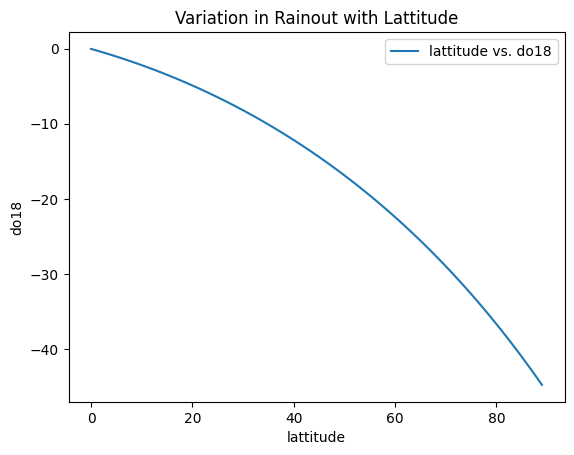

In [15]:
### just theta vs. do18
plt.plot(theta, do18,  label = 'lattitude vs. do18')
plt.title("Variation in Rainout with Lattitude")
plt.xlabel("lattitude")
plt.ylabel("do18")
plt.legend()

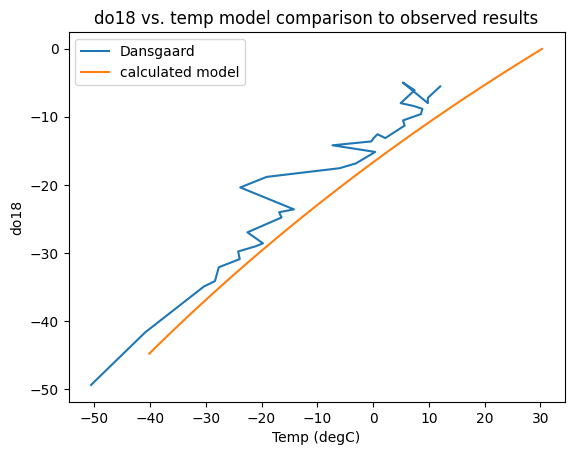

In [16]:
### temp and do18 vs data given: 
plt.plot(o18['T (degC)'], o18['d18O'], label = 'Dansgaard')
plt.plot(np.float_(temps)-273.15, do18,  label = 'calculated model')
plt.title("do18 vs. temp model comparison to observed results")
plt.xlabel("Temp (degC)")
plt.ylabel("do18")
plt.legend()

### Commentary: 
It appears that the calculated model fit the Dansgaard data fairly well, our model may be slightly shifted down in temperature, but overall the trend fits and is within the scale of magnitude of observed. 